# Importing required modules

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [13]:
#Load data by reading a csv file
df=pd.read_csv("stroke_data.csv")

# Examine the data

In [14]:
df.head(15)
#displays the top 15 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [15]:
df.tail()
#display the last 5 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


# Analysing the data

In [16]:
df.info()#showing information about database

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.gender.unique()
df.smoking_status.unique()
df.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [19]:
# removing ID
df.drop("id",inplace=True,axis=1)

Unique values
 ['Male' 'Female' 'Other']
Value counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Gender plot:


<AxesSubplot:xlabel='gender', ylabel='count'>

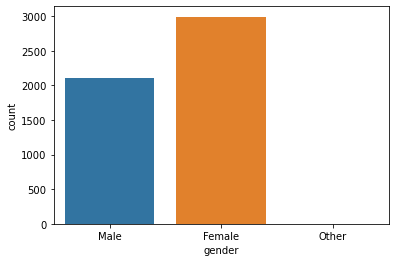

In [24]:
# Gender wise comparison of stroke rate.
print('Unique values\n',df['gender'].unique())
print('Value counts\n',df['gender'].value_counts())
print('\nGender plot:')
sns.countplot(data=df,x='gender')

Relation of stroke with gender:


<AxesSubplot:xlabel='gender', ylabel='count'>

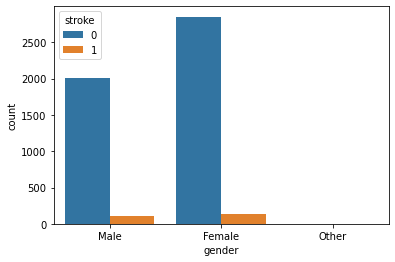

In [26]:
print("Relation of stroke with gender:")
sns.countplot(data=df,x='gender',hue='stroke')
#This plot shows how the gender will effect the stroke

In [29]:
#Age:
print("Number of unique values: ",df['age'].nunique())

Number of unique values:  104


C:\Users\kranthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

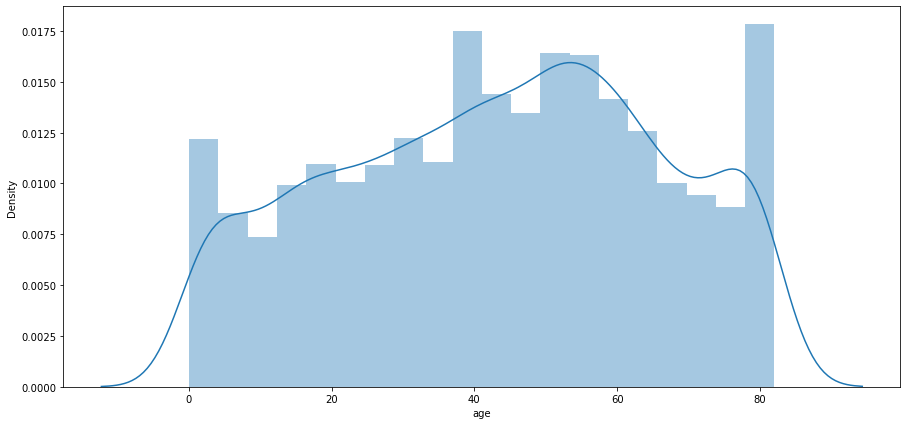

In [32]:
plt.figure(figsize=(15,7))
sns.distplot(df['age'])

<AxesSubplot:xlabel='stroke', ylabel='age'>

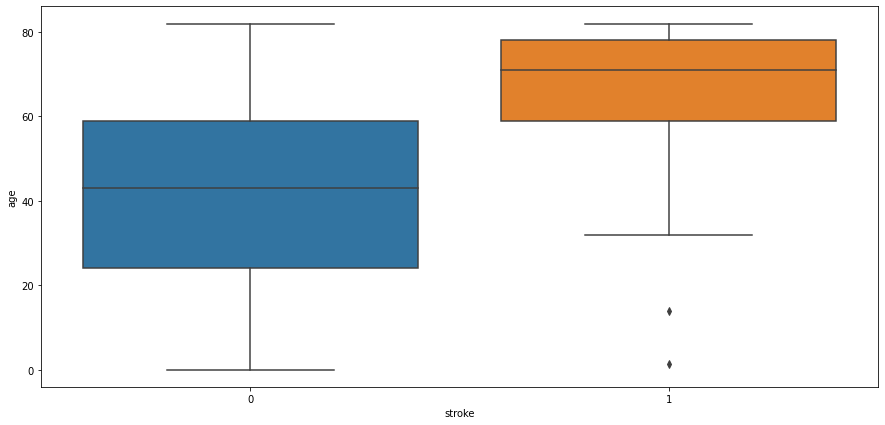

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='stroke',y='age')

C:\Users\kranthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

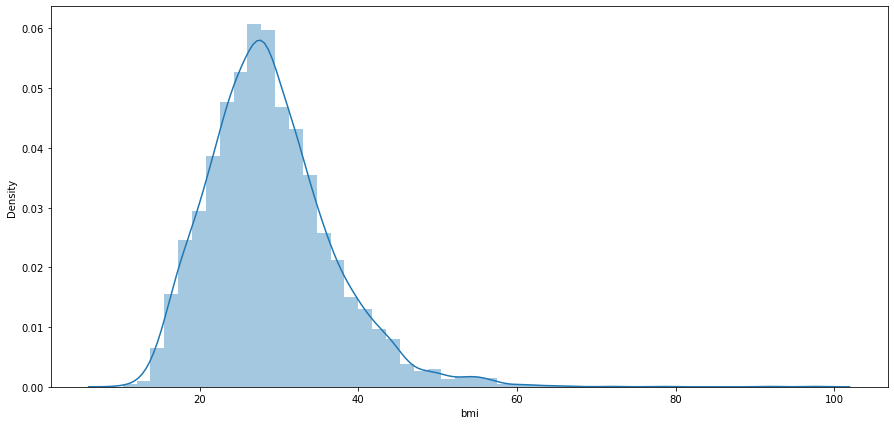

In [35]:
# Hypertension:
plt.figure(figsize=(15,7))
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

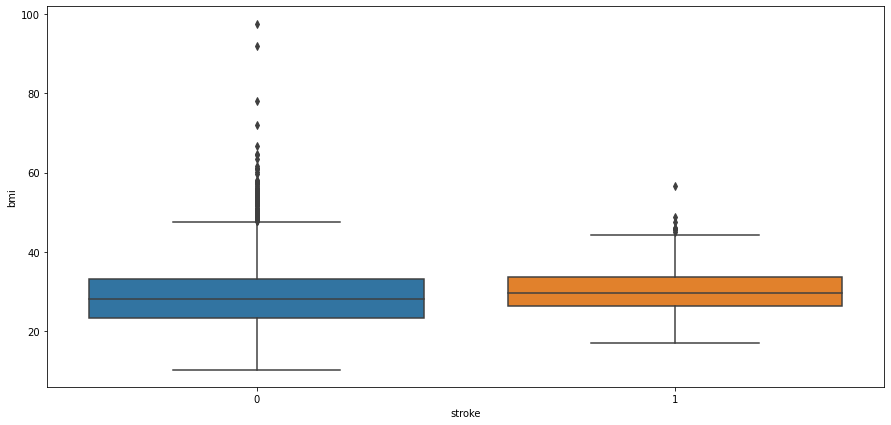

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x='stroke',y='bmi')

In [39]:
#Heart Disease: people having heart disease have higher chances of getting heart stroke
print('Unique values\n',df['heart_disease'].unique())
print('Value counts\n',df['heart_disease'].value_counts())

Unique values
 [1 0]
Value counts
 0    4834
1     276
Name: heart_disease, dtype: int64


<AxesSubplot:xlabel='heart_disease', ylabel='count'>

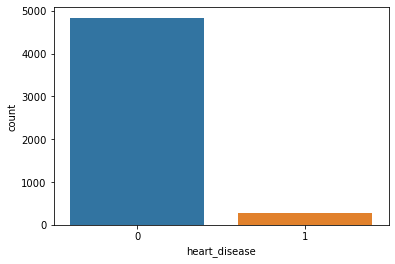

In [42]:
#plt.figure(figsize=(15,7))
sns.countplot(data=df,x='heart_disease')
#plotting counterplot of var 'heart diseases'

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

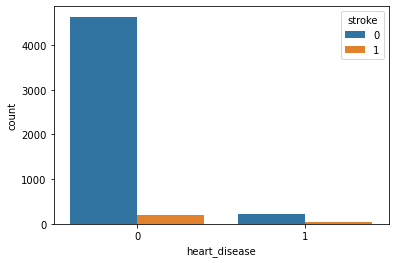

In [43]:
sns.countplot(data=df,x='heart_disease',hue='stroke')

Unique values:
 ['Yes' 'No']
Value counts:
 Yes    3353
No     1757
Name: ever_married, dtype: int64


<AxesSubplot:xlabel='ever_married', ylabel='count'>

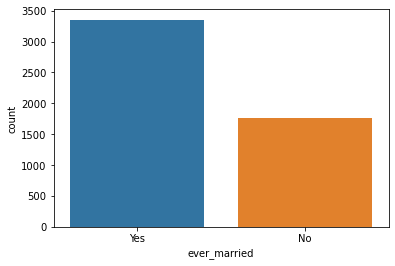

In [45]:
#Ever Married
print('Unique values:\n',df['ever_married'].unique())
print('Value counts:\n',df['ever_married'].value_counts())
sns.countplot(data=df,x='ever_married')

<AxesSubplot:xlabel='ever_married', ylabel='count'>

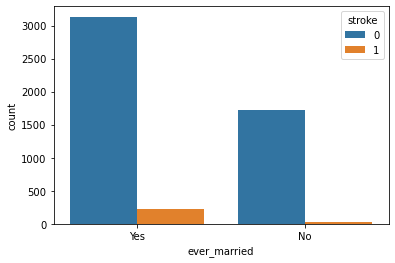

In [46]:
sns.countplot(data=df,x='ever_married',hue='stroke')

Unique values:
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value counts:
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<AxesSubplot:xlabel='work_type', ylabel='count'>

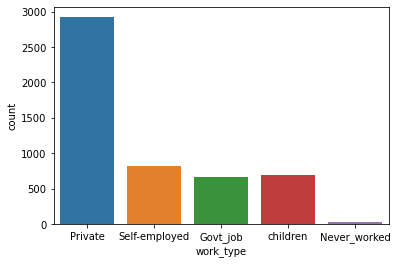

In [47]:
print('Unique values:\n',df['work_type'].unique())
print('Value counts:\n',df['work_type'].value_counts())
sns.countplot(data=df,x='work_type')

<AxesSubplot:xlabel='work_type', ylabel='count'>

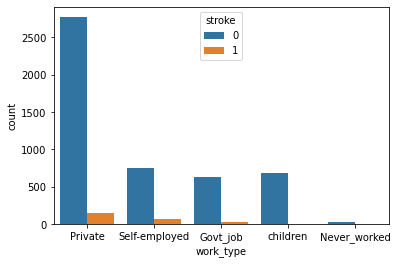

In [48]:
sns.countplot(data=df,x='work_type',hue='stroke')

Unique values:
 ['Urban' 'Rural']
Value counts:
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


<AxesSubplot:xlabel='Residence_type', ylabel='count'>

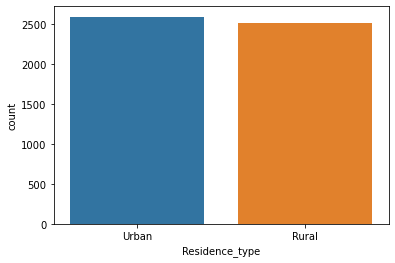

In [50]:
#Residence type:
print('Unique values:\n',df['Residence_type'].unique())
print('Value counts:\n',df['Residence_type'].value_counts())
sns.countplot(data=df,x='Residence_type')

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

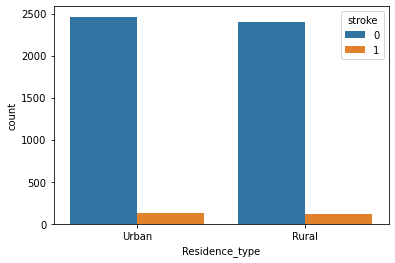

In [51]:
sns.countplot(data=df,x='Residence_type',hue='stroke')

3979


C:\Users\kranthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='avg_glucose_level', ylabel='Density'>

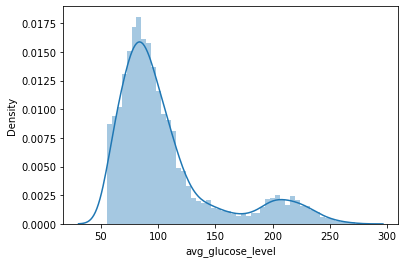

In [52]:
# Average glucose level
print(df['avg_glucose_level'].nunique())
sns.distplot(df['avg_glucose_level'])

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

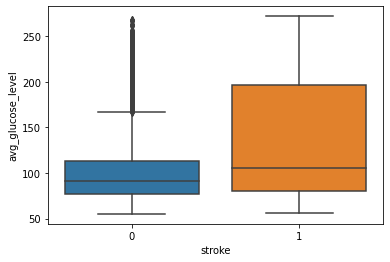

In [53]:
sns.boxplot(data=df,x='stroke',y='avg_glucose_level')

In [54]:
#BMI
df['bmi'].isna().sum() #no.of null values

201

419


C:\Users\kranthi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

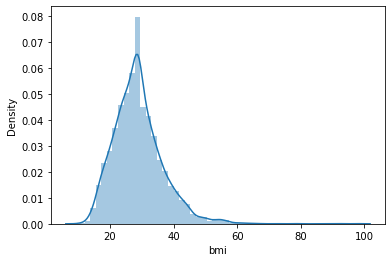

In [63]:
#Nearly 4% of missing values are there, so don't drop imputation can be used
#and the missing values can be replaced by the mean value

df['bmi'].fillna(df['bmi'].mean(),inplace=True)
print(df['bmi'].nunique())
sns.distplot(df['bmi'])

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

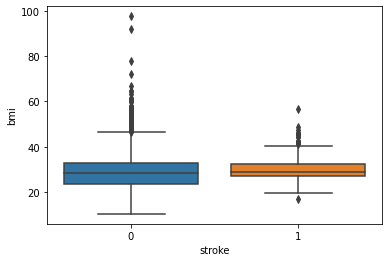

In [56]:
sns.boxplot(data=df,x='stroke',y='bmi')

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<AxesSubplot:xlabel='smoking_status', ylabel='count'>

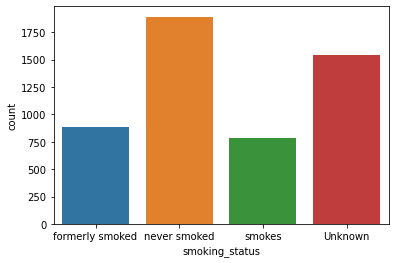

In [57]:
print('Unique values\n',df['smoking_status'].unique())
print('Value counts\n',df['smoking_status'].value_counts())
sns.countplot(data=df,x='smoking_status')

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

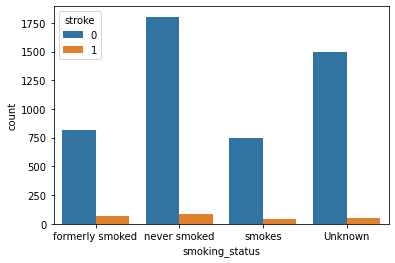

In [58]:
sns.countplot(data=df,x='smoking_status',hue='stroke')

Unique values
 [1 0]
Value counts
 0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

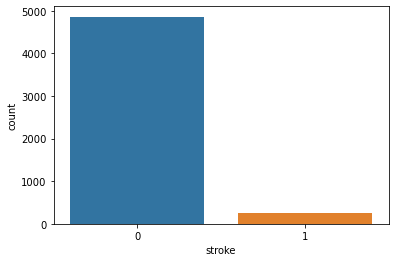

In [59]:
#Target variable: Stroke

print('Unique values\n',df['stroke'].unique())
print('Value counts\n',df['stroke'].value_counts())
sns.countplot(data=df,x='stroke')

# Observation:

- Gender: We can see in the plot that thre is not much diffference between stroke rate concerning gender.

- Age: People aged more than 60 years tend to have a stroke. Some outliers can be seen as people below age 20 are having a stroke it might be possible that it's valid data as stroke also depends on our eating and living habits. Another observation is people not having strokes also consist of people with age greater than 60 yrs.

- Hypertension: hypertension is rare in young people and common in aged people. The dataset has little data on patients having hypertension so its quite confusing to predict.

- Heart_disease: As per the dataset heart disease is not effecting the stroke rate

- Ever_married: people who are married have a higher stroke rate

- Work_type: people working in the private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

- Residence type: There is not much difference in both attr values. may be we should discard it.

- Smoking status: there is not much differences in the chances of stroke w.r.t smoking status

**We can drop the columns like id,ever_married, work_type and Residence_type which don't effect the prediction of dependent variable i.e., heart stroke**

In [8]:
df.drop(['id','ever_married','work_type','Residence_type'],axis=1,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                4909 non-null   float64
 6   smoking_status     5110 non-null   object 
 7   stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 319.5+ KB


# Mapping
* gender from object type to int type

In [11]:
gender_mapping={"Female":0,"Male":1,"Other":2}
df["gender"]=df["gender"].map(gender_mapping)
df["gender"].head()

0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: int64

In [12]:
# Mapping smoke object to int
smoke_mapping={"formerly smoked":0,"never smoked":1,"smokes":2,"Unknown":3}
df["smoking_status"]=df["smoking_status"].map(smoke_mapping)
df["smoking_status"].head()

0    0
1    1
2    1
3    2
4    1
Name: smoking_status, dtype: int64

# Another method
# Label Encoding:

* Our dataset is a mix of both categorical and numeric data and since ML algorithms understand data of numeric nature let’s encode our categorical data into numeric ones using Label Encoder. Label Encoder is a technique that will convert categorical data into numeric data. It takes value in ascending order and converts it into numeric data from 0 to n-1.

cols=df.select_dtypes(include=['object']).columns
#fetching the cols whose data type is object
print(cols)
#initializing the label encoder object
le=LabelEncoder()
#Transfering categorical date into numeric
df[cols]=df[cols].apply(le.fit_transform)
print()
df.head(10)


In [73]:
df.isnull().sum()/df.shape[0]*100
#The percentage of the missing values

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64

In [74]:
#The values which composes diff columns
df.nunique(axis=0)

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

Number of people having gender as 0 are 2994 and number of people having gender as 1 are 2115


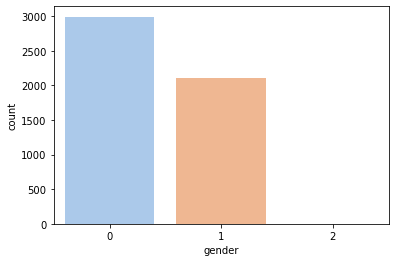

In [18]:
print(f'Number of people having gender as 0 are {df.gender.value_counts()[0]} and number of people having gender as 1 are {df.gender.value_counts()[1]}')
sns.countplot(data=df,x="gender",palette='pastel')
plt.show()

# Data distribution

C:\Users\kranthi\AppData\Local\Temp\ipykernel_1184\3716091685.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


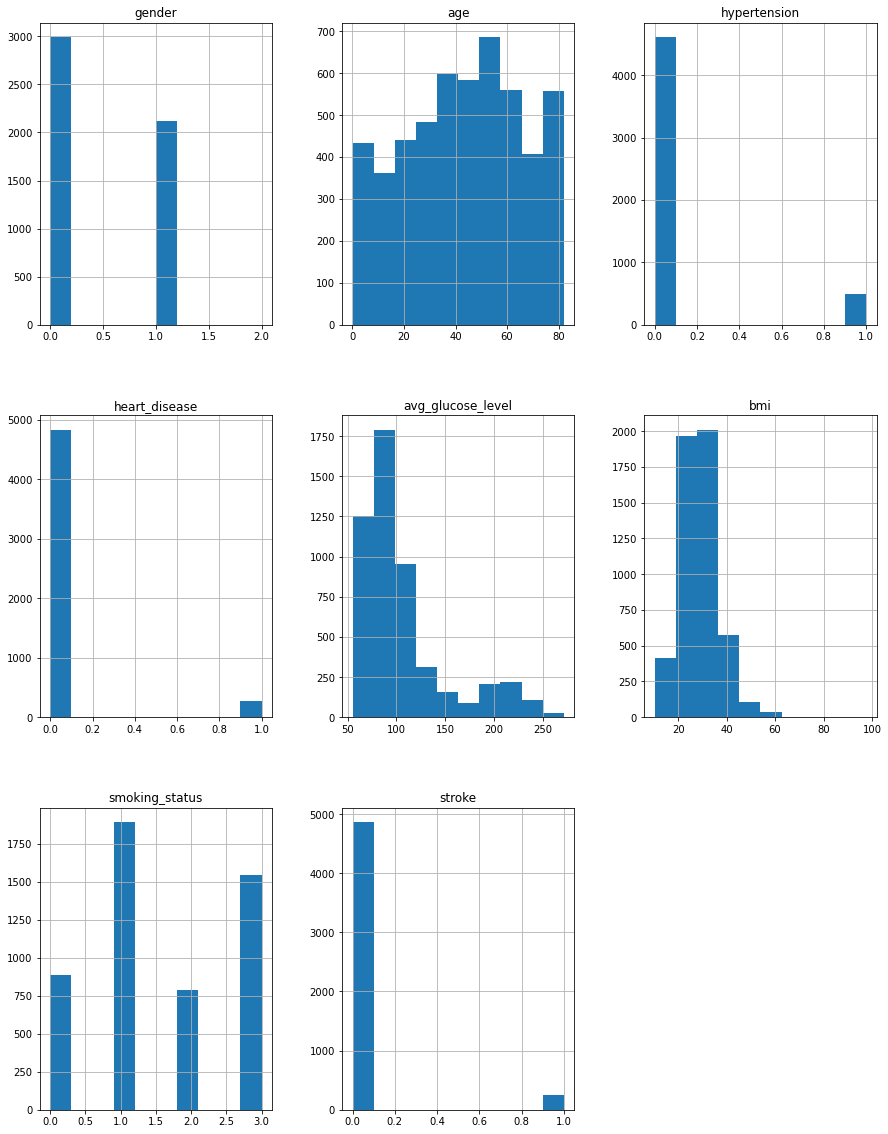

In [19]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

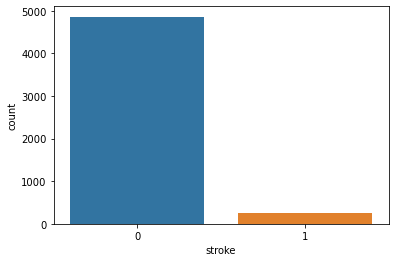

In [20]:
sns.countplot(x='stroke',data=df)
plt.show()

In [21]:
stroke=df.stroke.value_counts()
print(f"There are {stroke[0]} patients without heart stroke and {stroke[1]} patients with the stroke")

There are 4861 patients without heart stroke and 249 patients with the stroke


# Visualisations

<AxesSubplot:>

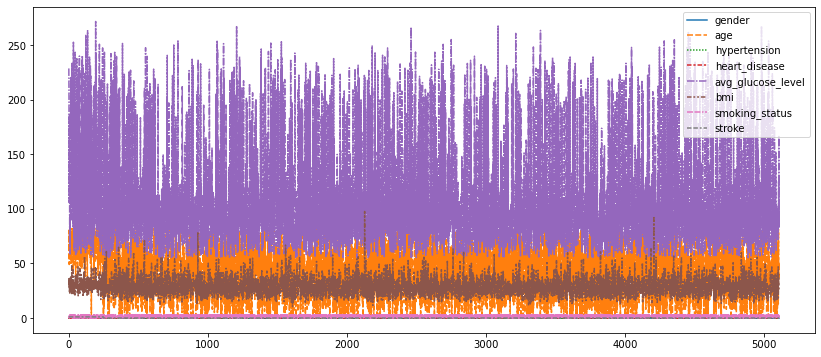

In [27]:
#setting the width and height of the figure
plt.figure(figsize=(14,6))
sns.lineplot(data=df)

<AxesSubplot:xlabel='gender', ylabel='stroke'>

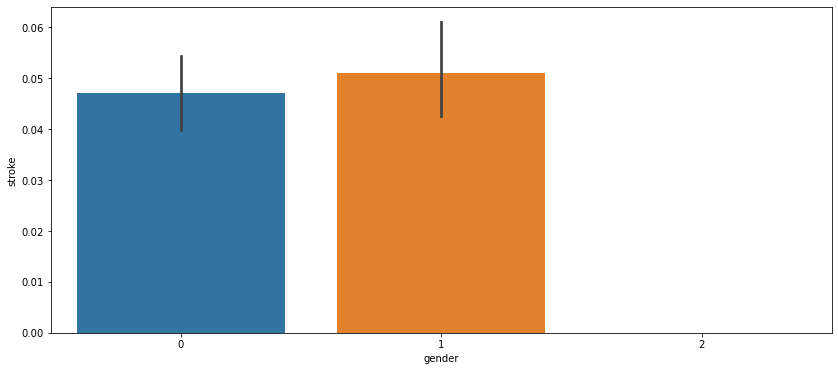

In [35]:
plt.figure(figsize=(14,6))
sns.barplot(x=df.gender,y=df.stroke)

<AxesSubplot:xlabel='heart_disease', ylabel='stroke'>

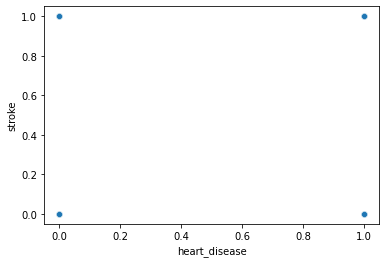

In [41]:
#scatter plots
sns.scatterplot(x=df.heart_disease,y=df.stroke)

<AxesSubplot:xlabel='heart_disease', ylabel='avg_glucose_level'>

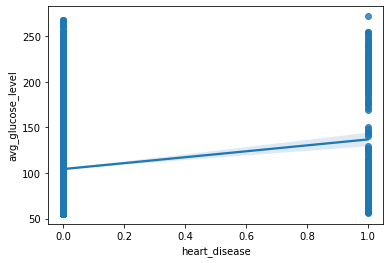

In [43]:
sns.regplot(x=df.heart_disease,y=df.avg_glucose_level)

<AxesSubplot:xlabel='bmi', ylabel='hypertension'>

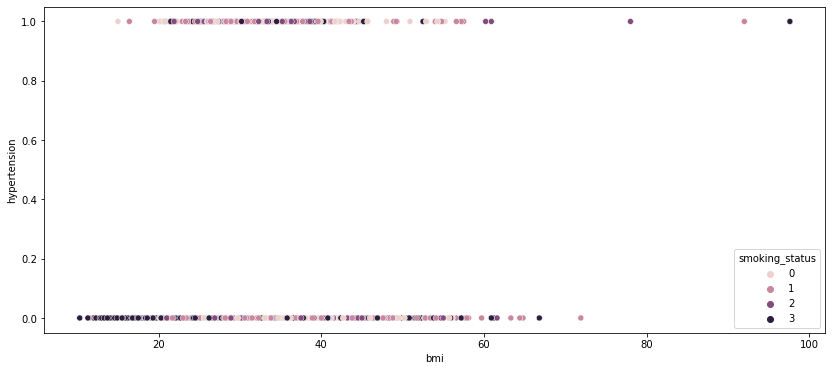

In [48]:
plt.figure(figsize=(14,6))
sns.scatterplot(x=df.bmi,y=df.hypertension,hue=df.smoking_status)

# Distributions

<AxesSubplot:xlabel='bmi', ylabel='Count'>

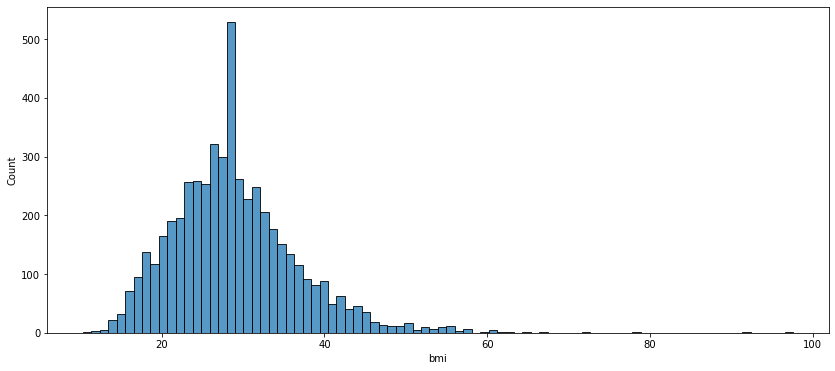

In [52]:
plt.figure(figsize=(14,6))
sns.histplot(df['bmi'])

<AxesSubplot:xlabel='smoking_status', ylabel='Count'>

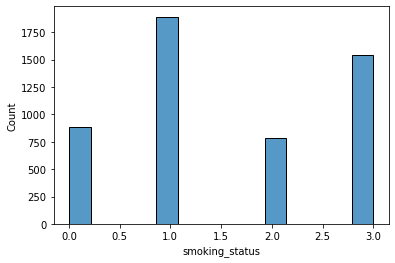

In [54]:
sns.histplot(df.smoking_status)

<AxesSubplot:xlabel='stroke', ylabel='Density'>

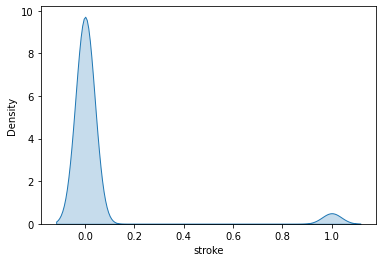

In [55]:
#density plots
sns.kdeplot(data=df.stroke,shade=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

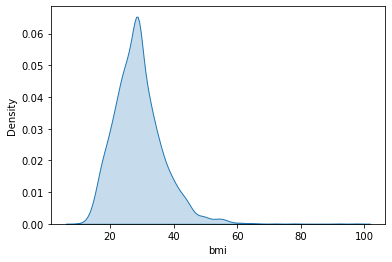

In [57]:
sns.kdeplot(data=df.bmi,shade=True)

<AxesSubplot:xlabel='heart_disease', ylabel='Density'>

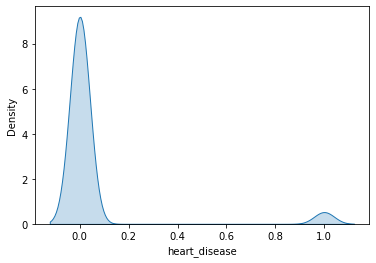

In [58]:
sns.kdeplot(data=df.heart_disease,shade=True)

<AxesSubplot:xlabel='bmi', ylabel='Density'>

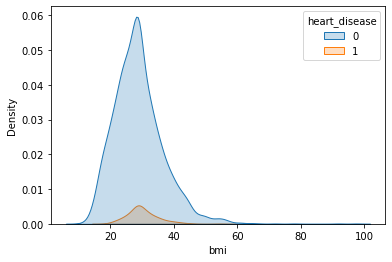

In [64]:
sns.kdeplot(data=df,x='bmi',hue='heart_disease',shade=True)

<AxesSubplot:xlabel='gender', ylabel='count'>

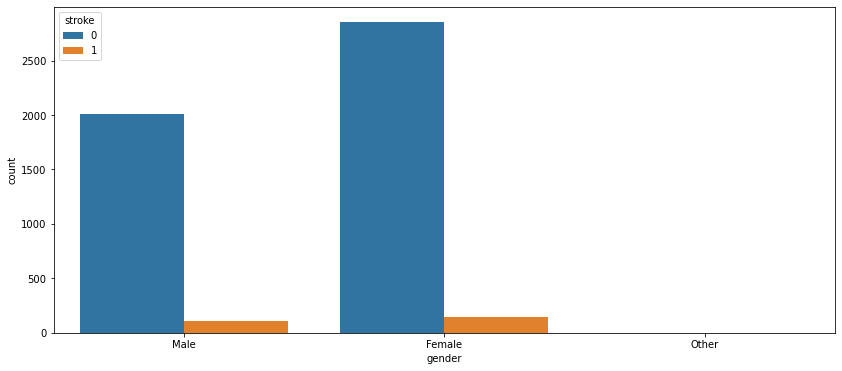

In [5]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x="gender",hue="stroke")

# Model Building

<AxesSubplot:>

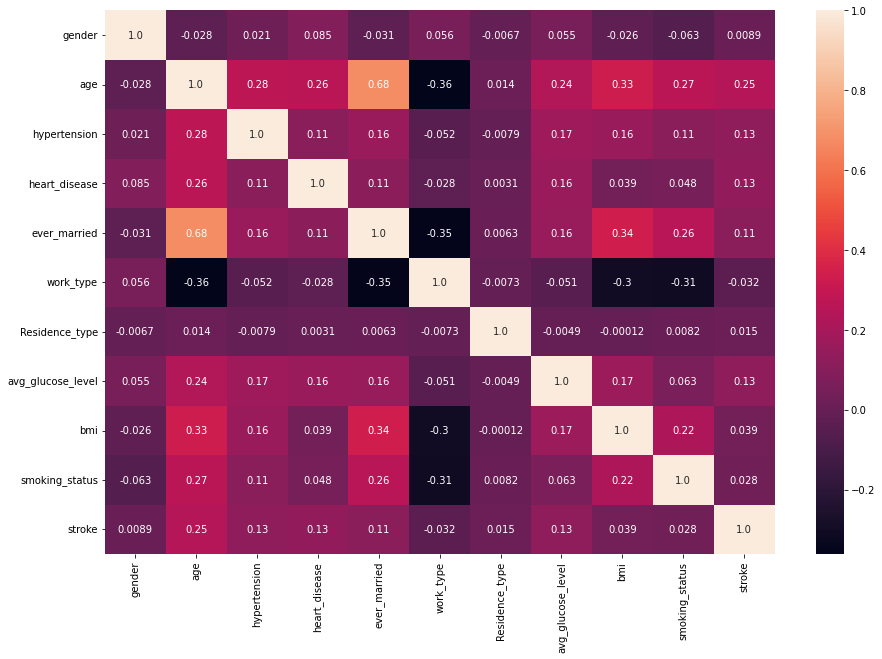

In [76]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.2')

# Observation:
- Variables that are showing some effective correlation are: age, hypertension, heart_disease, ever_married, avg_glucose_level.

In [77]:
#Splitting data
train_x,test_x,train_y,test_y = train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)

print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

NameError: name 'train_test_split' is not defined